 <h1 align= "center">
<b> ⚕ Detection Of Lung Infection ⚕ </b> </h1> 

# **Project Content** 


1. [Introduction](#1)
  * 1.1[Aim of the project](#1.1) 
  * 1.2[Dataset Information](#1.2)
     
2. [Importing Libraries and Dataset](#2) 
3. [A look on our Data](#3)
4. [Data Augmentation](#4)
5. [Building neural network](#5)
  * [Model 1](#5.1)
  * [Model 2](#5.2)
  * [Model 3](#5.3)
9. [Evaluating our Neural Network](#9)
10.[Visualizing the Results](#10) 

<a name='1'></a>
## **Introduction**

- Artificial Intelligence has evolved a lot and is currently able to solve problems that are very complex and require human specialization. One such area is healthcare.

- A lot of research happens every day to use deep learning for the betterment of humanity, and one such is healthcare.

- There are different kind of reports we see in medical field related to diseases and body conditions such as X-Ray report, blood report ,MRI scan etc.

- These reports helps in diagnosing the disease or deficiencies and guide us to take necessary steps.

- In this project we'll be using X-Ray reports to predict infection in lung.



 

<a name='1.1'></a>
### *Aim of the project*

- **To build a model using a convolutional neural network that can classify lung infection in a person using medical imagery.**

 

<a name='1.2'></a>
### *Dataset Information*

- The dataset contains three different classes. 
  1. healthy 
  2. type 1 disease 
  3. type 2 disease.

 

- Train folder : 
  - This folder has images for training the model, which is divided into        subfolders having the same name as the class. 

- Test folder : 
 - This folder has images for testing the model, which is divided into subfolders having the same name as the class.

<a name='2'></a>
## **Importing Libraries and Dataset** 

In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.layers import Dense , Conv2D , MaxPooling2D, Flatten,BatchNormalization, Activation, MaxPooling2D , MaxPool2D

from tensorflow.keras.applications import MobileNet , DenseNet121
from tensorflow.keras.callbacks import EarlyStopping  

In [3]:
train_path=r"C:\Users\ashmi\Data Science\Projects\Lung Infection\Lung Infection\test"
test_path=r"C:\Users\ashmi\Data Science\Projects\Lung Infection\Lung Infection\train"

In [4]:
image_size=[224,224]

<a name='3'></a>
## **A look on our Image Data**

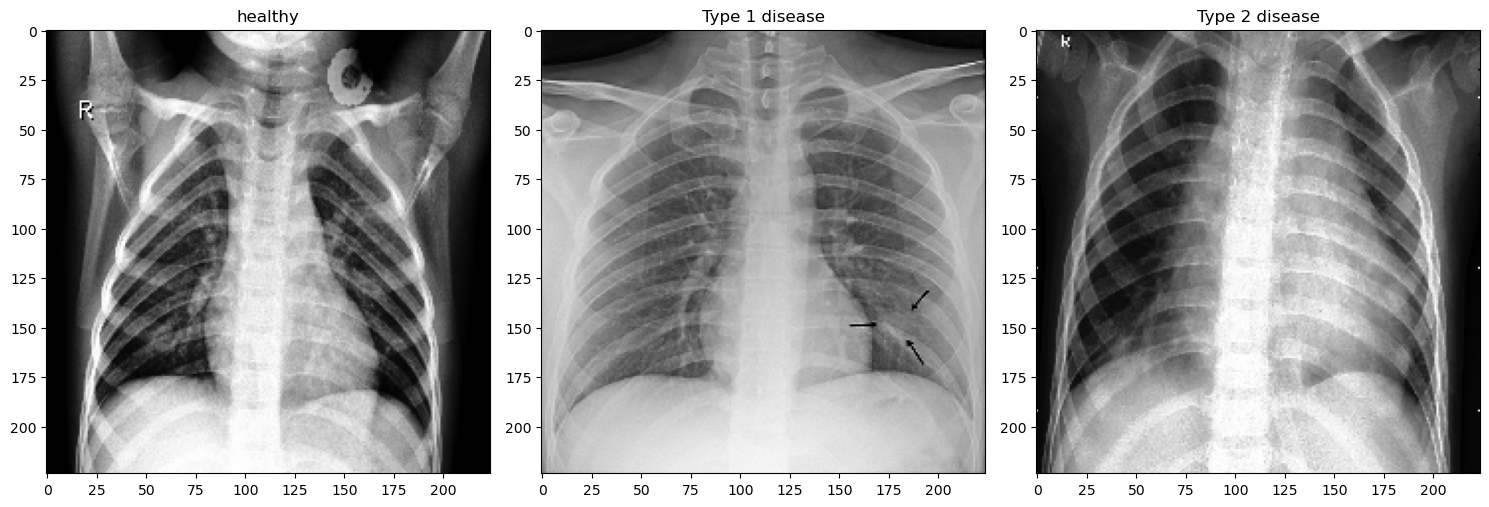

In [5]:
fig = plt.figure(figsize = (15,15))
plot_no = 1
for each_folder in os.listdir(train_path):
    
    complete_folder_path = os.path.join(train_path , each_folder)
    first_image_path = os.path.join( complete_folder_path , os.listdir(complete_folder_path)[5] )
    
    image = load_img( first_image_path , target_size = (image_size))
    
    plt.subplot(1,3,plot_no)
    plt.imshow( image  , cmap = "gray") 
    plt.title(each_folder)
    
    plot_no += 1

plt.tight_layout()
plt.show()

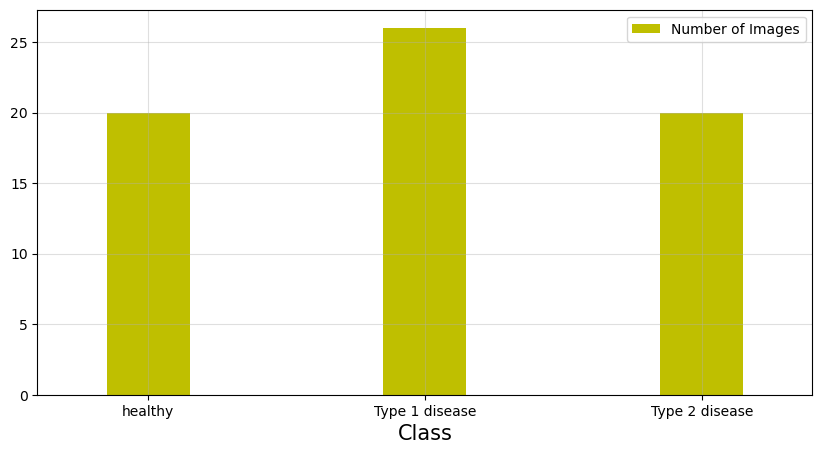

In [6]:
train_data= pd.DataFrame({'Class' : None , 'Number of Images' : None} , index = range(3))

c = 0
for each_folder in os.listdir(train_path):
    train_data.at[c , 'Class'] = each_folder
    train_data.at[c , 'Number of Images'] = len(os.listdir(os.path.join(train_path , each_folder)))
    c += 1
    
train_data.set_index('Class' , inplace = True)

train_data.plot(kind = 'bar' , color = 'y' , figsize = (10, 5) , rot = 0 , width = 0.3)
plt.grid('True' , alpha = 0.4)
plt.xlabel('Class' , size = 15)
plt.show()

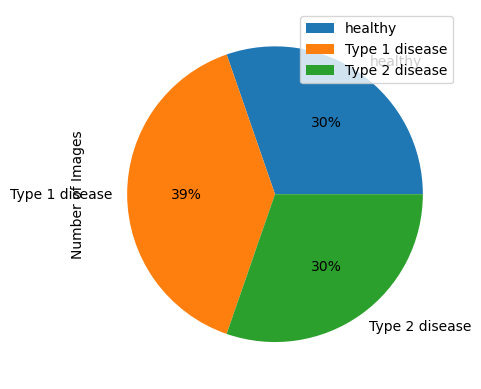

In [7]:

train_data.plot(kind='pie',y='Number of Images',autopct='%1.0f%%');

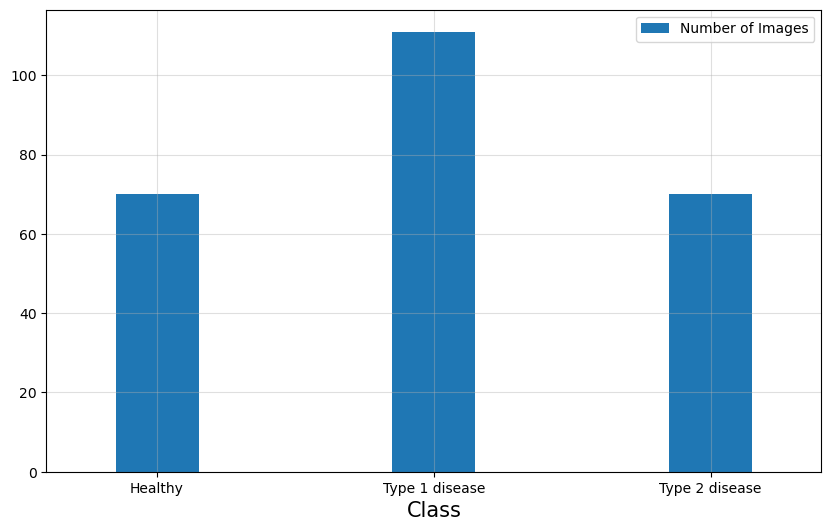

In [8]:
test_data = pd.DataFrame({'Class' : None , 'Number of Images' : None} , index = range(3))

c = 0
for each_folder in os.listdir(test_path):
    test_data.at[c , 'Class'] = each_folder
    test_data.at[c , 'Number of Images'] = len(os.listdir(os.path.join(test_path , each_folder)))
    c += 1
    
test_data.set_index('Class' , inplace = True)

test_data.plot(kind = 'bar' , figsize = (10, 6) , rot = 0 , width = 0.3)
plt.grid('True' , alpha = 0.4)
plt.xlabel('Class' , size = 15)
plt.show()

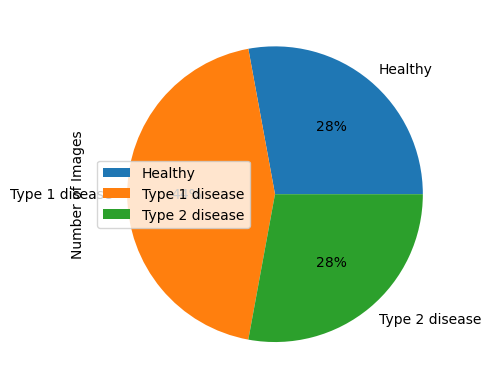

In [9]:
test_data.plot(kind='pie',y='Number of Images',autopct='%1.0f%%');

<a name='4'></a>
## **Data Augmentation**

In [10]:
train_datagen = ImageDataGenerator(
	rescale=1. / 255.0,
	rotation_range=10,
	#brightness_range=[0.4,1.5],
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	#horizontal_flip=True,
	#vertical_flip=True,
	fill_mode="nearest"
	)

In [11]:
training_set=train_datagen.flow_from_directory(train_path,
                                               target_size=image_size,
                                               #color_mode="grayscale",
                                               batch_size = 8,
                                               class_mode='categorical',
                                              )

Found 66 images belonging to 3 classes.


(8, 224, 224, 3)


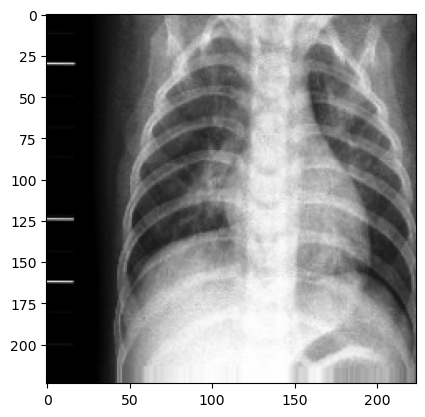

(8, 224, 224, 3)


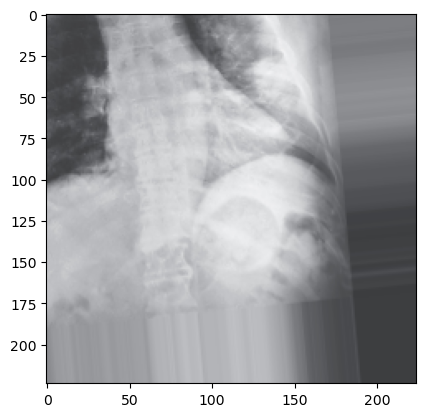

(8, 224, 224, 3)


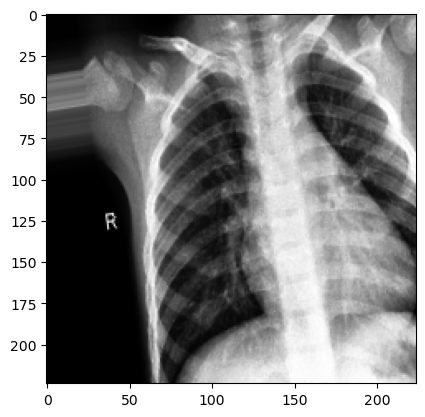

(8, 224, 224, 3)


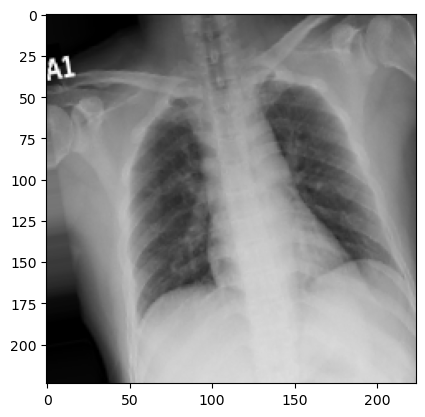

(8, 224, 224, 3)


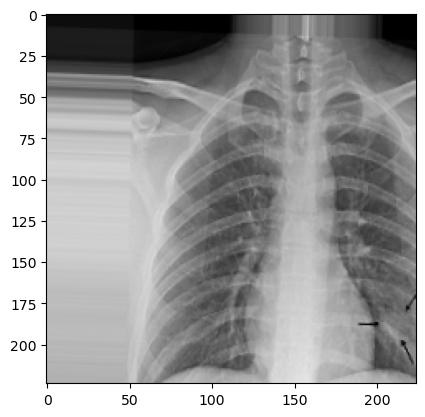

In [12]:
for _ in range(5):
    img, label = training_set.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

In [13]:
test_datagen=ImageDataGenerator(rescale=1./255,)

In [14]:
test_set=test_datagen.flow_from_directory(test_path,
                                          target_size=image_size,
                                          batch_size = 8,
                                          #color_mode="grayscale",
                                          class_mode='categorical',
                                  )

Found 251 images belonging to 3 classes.


<a name='5'></a>
## **Building Neural Network**

<a name='5.1'></a>
### **Model 1 - Customized Neural Network from scratch**

<a name='5.1.1'></a>
#### *Intializing and defining the layers of CNN*

In [15]:
# Initializing Sequential Model
model=Sequential()

In [16]:
# Defining 1st Layer of CNN
model.add( Conv2D( filters=32,
                  kernel_size=3 , 
                  input_shape =(image_size +[3] ),
                  activation='relu',
                  strides=(1, 1),
                  padding='same')
           )
model.add( MaxPooling2D(pool_size = (2,2) ) )
#model.add( Dropout(0.1) )

In [17]:
# Defining 2nd Layer
model.add( Conv2D( filters=64,
                  kernel_size=3 , 
                  activation='relu',
                  strides=(1, 1),
                  padding='same') )
model.add( MaxPooling2D(pool_size = (2,2) ) )
#model.add( Dropout(0.1) )

In [18]:
#Defining 4th Layer
model.add( Conv2D( filters=128,
                  kernel_size=3 ,
                  activation='relu' ,
                 strides=(1,1),
                 padding='same'))
model.add( MaxPooling2D(pool_size = (2,2) ) )

In [19]:
#Flattening the output into single dimensional array for input to Neural Network
model.add(Flatten())

In [20]:
model.add(Dense(units=128,
                activation='relu'))

In [21]:
model.add(Dense(units=64,
                activation='relu'))

In [22]:
#Output 
model.add(Dense(3, activation = 'softmax'))

In [23]:
#Compilation 
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [24]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 128)       0

In [35]:
#Defining Callback Metrices for early stopping
callback = EarlyStopping( monitor ='val_loss', min_delta = 0.1 ,
                 patience = 2 ,  mode = 'min' , restore_best_weights = True) 

In [26]:
epochs = 10

history1 = model.fit(training_set,
                    steps_per_epoch = training_set.n//training_set.batch_size,
                    epochs = epochs,
                    validation_data = test_set,
                    validation_steps = test_set.n//test_set.batch_size , 
                     #callbacks = [callback]
                    )

Epoch 1/10


8/8 [==============================] - 12s 2s/step - loss: 1.6308 - accuracy: 0.3103 - val_loss: 1.0899 - val_accuracy: 0.4476
Epoch 2/10
8/8 [==============================] - 9s 1s/step - loss: 1.1423 - accuracy: 0.3103 - val_loss: 1.1195 - val_accuracy: 0.2782
Epoch 3/10
8/8 [==============================] - 9s 1s/step - loss: 1.0655 - accuracy: 0.4310 - val_loss: 1.1267 - val_accuracy: 0.1774
Epoch 4/10
8/8 [==============================] - 10s 1s/step - loss: 1.0376 - accuracy: 0.5517 - val_loss: 1.1986 - val_accuracy: 0.2500
Epoch 5/10
8/8 [==============================] - 9s 1s/step - loss: 0.9480 - accuracy: 0.5517 - val_loss: 1.4025 - val_accuracy: 0.3508
Epoch 6/10
8/8 [==============================] - 10s 1s/step - loss: 0.8529 - accuracy: 0.5938 - val_loss: 1.8708 - val_accuracy: 0.0524
Epoch 7/10
8/8 [==============================] - 9s 1s/step - loss: 0.7508 - accuracy: 0.6379 - val_loss: 2.0598 - val_accuracy: 0.1492
Epoch 8/10
8/8 [====================

In [ ]:
history1=pd.DataFrame(history1.history)

In [ ]:
history1

In [ ]:
plt.figure(figsize = (15,4))
plt.plot(history1.loss, label='Loss')
plt.plot(history1.val_loss, label='Validation Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [ ]:
plt.figure(figsize = (15,4))
plt.plot(history1.accuracy, label='Accuracy')
plt.plot(history1.val_accuracy, label='Validation Accuracy')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

<a name='5.2'></a>
### **Model 2 - MobileNet Neural Network**

In [31]:
mobilenet= MobileNet(include_top = False, weights = 'imagenet', input_shape = (224,224,3))

x = Flatten()(mobilenet.output)

x=(Dense(units=256,
                activation='relu',
                kernel_regularizer=regularizers.L1()))(x)
x= BatchNormalization()(x)
x=Dropout(0.1)(x)
 
predictions = Dense(3, activation = 'softmax')(x)

mobilenet_model = Model(inputs = mobilenet.input, outputs = predictions)

mobilenet_model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

mobilenet_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [33]:

from keras.applications import MobileNet
from keras.layers import Dense, Flatten, BatchNormalization, Dropout
from keras.models import Model
from keras import regularizers
from keras import callbacks


In [36]:
history_mobilenet=mobilenet_model.fit(training_set,
                             steps_per_epoch = training_set.n//training_set.batch_size,
                             epochs = 15,
                             validation_data = test_set,
                             validation_steps = test_set.n//test_set.batch_size ,
                             callbacks = [callback]
                             )

Epoch 1/15
8/8 [==============================] - 16s 2s/step - loss: 322.3541 - accuracy: 0.5690 - val_loss: 150.5523 - val_accuracy: 0.1895
Epoch 2/15
8/8 [==============================] - 11s 1s/step - loss: 112.1360 - accuracy: 0.6897 - val_loss: 104.0785 - val_accuracy: 0.3387
Epoch 3/15
8/8 [==============================] - 11s 1s/step - loss: 97.2033 - accuracy: 0.6897 - val_loss: 98.5493 - val_accuracy: 0.2339
Epoch 4/15
8/8 [==============================] - 11s 2s/step - loss: 90.0435 - accuracy: 0.7414 - val_loss: 95.5212 - val_accuracy: 0.1411
Epoch 5/15
8/8 [==============================] - 11s 1s/step - loss: 87.4968 - accuracy: 0.7069 - val_loss: 97.0448 - val_accuracy: 0.2823
Epoch 6/15
8/8 [==============================] - 11s 2s/step - loss: 86.8465 - accuracy: 0.7069 - val_loss: 96.1707 - val_accuracy: 0.3387


In [37]:
history_mobilenet=pd.DataFrame(history_mobilenet.history)

In [38]:
history_mobilenet

,loss,accuracy,val_loss,val_accuracy
0,322.354095,0.568965,150.552338,0.189516
1,112.136009,0.689655,104.078506,0.338710
2,97.203255,0.689655,98.549286,0.233871
3,90.043518,0.741379,95.521187,0.141129
4,87.496834,0.706897,97.044830,0.282258
5,86.846466,0.706897,96.170738,0.338710


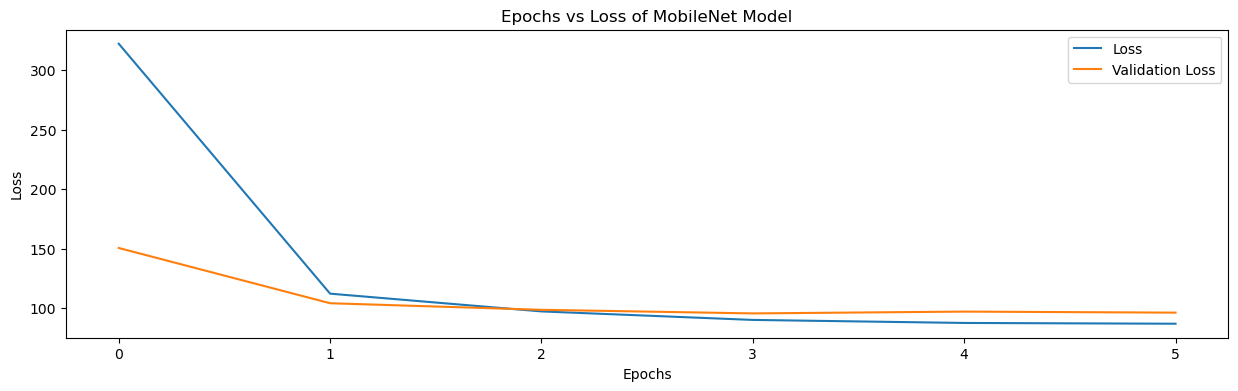

In [39]:
plt.figure(figsize = (15,4))
plt.plot(history_mobilenet.loss, label='Loss')
plt.plot(history_mobilenet.val_loss, label='Validation Loss')
plt.title('Epochs vs Loss of MobileNet Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

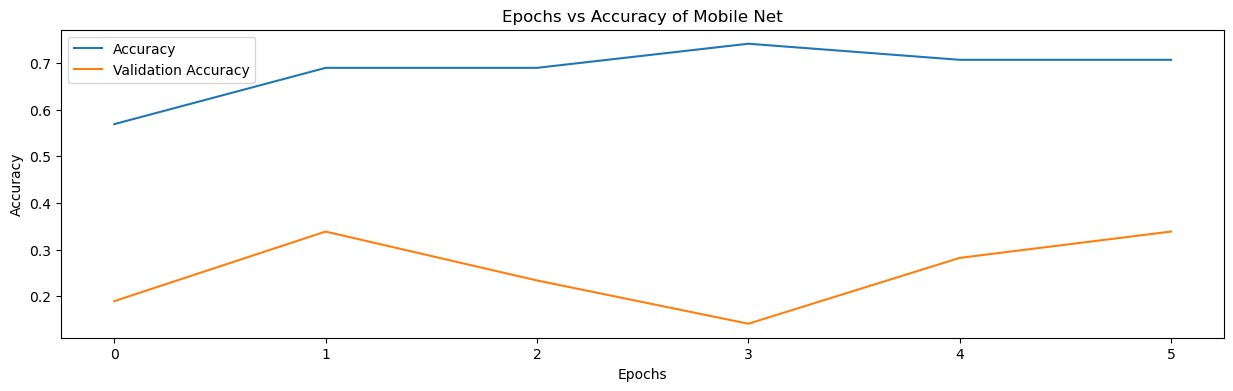

In [40]:
plt.figure(figsize = (15,4))
plt.plot(history_mobilenet.accuracy, label='Accuracy')
plt.plot(history_mobilenet.val_accuracy, label='Validation Accuracy')
plt.title('Epochs vs Accuracy of Mobile Net')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [41]:
#Loading the Mobilenet model 
densenet = DenseNet121(include_top = False, weights = 'imagenet', input_shape = (224,224,3))



x = Flatten()(densenet.output)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.1)(x)
x = BatchNormalization()(x)
predictions = Dense(3, activation = 'softmax')(x)

model_densenet = Model(inputs =densenet.input, outputs = predictions)

model_densenet.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model_densenet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_4[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']    

 conv2_block4_0_bn (BatchNo  (None, 56, 56, 160)          640       ['conv2_block3_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block4_0_relu (Activ  (None, 56, 56, 160)          0         ['conv2_block4_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_block4_1_conv (Conv2  (None, 56, 56, 128)          20480     ['conv2_block4_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv2_block4_1_bn (BatchNo  (None, 56, 56, 128)          512       ['conv2_block4_1_conv[0][0]'] 
 rmalizati

 rmalization)                                                                                     
                                                                                                  
 conv3_block1_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block1_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block1_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block1_concat (Conca  (None, 28, 28, 160)          0         ['pool2_pool[0][0]',          
 tenate)                                                             'conv3_block1_2_conv[0][0]'] 
          

 conv3_block5_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block5_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block5_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block5_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block5_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block5_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block5_concat (Conca  (None, 28, 28, 288)          0         ['conv3_block4_concat[0][0]', 
 tenate)  

                                                                                                  
 conv3_block9_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block9_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block9_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block9_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block9_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block9_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_blo

 pool3_pool (AveragePooling  (None, 14, 14, 256)          0         ['pool3_conv[0][0]']          
 2D)                                                                                              
                                                                                                  
 conv4_block1_0_bn (BatchNo  (None, 14, 14, 256)          1024      ['pool3_pool[0][0]']          
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_0_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_1_conv (Conv2  (None, 14, 14, 128)          32768     ['conv4_block1_0_relu[0][0]'] 
 D)       

                                                                                                  
 conv4_block4_concat (Conca  (None, 14, 14, 384)          0         ['conv4_block3_concat[0][0]', 
 tenate)                                                             'conv4_block4_2_conv[0][0]'] 
                                                                                                  
 conv4_block5_0_bn (BatchNo  (None, 14, 14, 384)          1536      ['conv4_block4_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block5_0_relu (Activ  (None, 14, 14, 384)          0         ['conv4_block5_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block8_concat (Conca  (None, 14, 14, 512)          0         ['conv4_block7_concat[0][0]', 
 tenate)                                                             'conv4_block8_2_conv[0][0]'] 
                                                                                                  
 conv4_block9_0_bn (BatchNo  (None, 14, 14, 512)          2048      ['conv4_block8_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block9_0_relu (Activ  (None, 14, 14, 512)          0         ['conv4_block9_0_bn[0][0]']   
 ation)                                                                                           
          

 conv4_block12_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block12_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block12_concat (Conc  (None, 14, 14, 640)          0         ['conv4_block11_concat[0][0]',
 atenate)                                                            'conv4_block12_2_conv[0][0]']
                                                                                                  
 conv4_block13_0_bn (BatchN  (None, 14, 14, 640)          2560      ['conv4_block12_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block13_0_relu (Acti  (None, 14, 14, 640)          0         ['conv4_block13_0_bn[0][0]']  
 vation)  

                                                                                                  
 conv4_block16_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block16_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block16_concat (Conc  (None, 14, 14, 768)          0         ['conv4_block15_concat[0][0]',
 atenate)                                                            'conv4_block16_2_conv[0][0]']
                                                                                                  
 conv4_block17_0_bn (BatchN  (None, 14, 14, 768)          3072      ['conv4_block16_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_blo

 vation)                                                                                          
                                                                                                  
 conv4_block20_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block20_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block20_concat (Conc  (None, 14, 14, 896)          0         ['conv4_block19_concat[0][0]',
 atenate)                                                            'conv4_block20_2_conv[0][0]']
                                                                                                  
 conv4_block21_0_bn (BatchN  (None, 14, 14, 896)          3584      ['conv4_block20_concat[0][0]']
 ormalization)                                                                                    
          

 conv4_block24_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block24_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block24_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block24_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block24_concat (Conc  (None, 14, 14, 1024)         0         ['conv4_block23_concat[0][0]',
 atenate)                                                            'conv4_block24_2_conv[0][0]']
                                                                                                  
 pool4_bn (BatchNormalizati  (None, 14, 14, 1024)         4096      ['conv4_block24_concat[0][0]']
 on)      

 rmalization)                                                                                     
                                                                                                  
 conv5_block4_0_relu (Activ  (None, 7, 7, 608)            0         ['conv5_block4_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block4_1_conv (Conv2  (None, 7, 7, 128)            77824     ['conv5_block4_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block4_1_bn (BatchNo  (None, 7, 7, 128)            512       ['conv5_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
          

 conv5_block8_0_bn (BatchNo  (None, 7, 7, 736)            2944      ['conv5_block7_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block8_0_relu (Activ  (None, 7, 7, 736)            0         ['conv5_block8_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block8_1_conv (Conv2  (None, 7, 7, 128)            94208     ['conv5_block8_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block8_1_bn (BatchNo  (None, 7, 7, 128)            512       ['conv5_block8_1_conv[0][0]'] 
 rmalizati

                                                                                                  
 conv5_block12_0_bn (BatchN  (None, 7, 7, 864)            3456      ['conv5_block11_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block12_0_relu (Acti  (None, 7, 7, 864)            0         ['conv5_block12_0_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block12_1_conv (Conv  (None, 7, 7, 128)            110592    ['conv5_block12_0_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_blo

 atenate)                                                            'conv5_block15_2_conv[0][0]']
                                                                                                  
 conv5_block16_0_bn (BatchN  (None, 7, 7, 992)            3968      ['conv5_block15_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block16_0_relu (Acti  (None, 7, 7, 992)            0         ['conv5_block16_0_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block16_1_conv (Conv  (None, 7, 7, 128)            126976    ['conv5_block16_0_relu[0][0]']
 2D)                                                                                              
          

In [42]:
history_densenet=model_densenet.fit(training_set,
                             steps_per_epoch = training_set.n//training_set.batch_size,
                             epochs = 15,
                             validation_data = test_set,
                             validation_steps = test_set.n//test_set.batch_size ,
                             #callbacks = [callback]
                             )

Epoch 1/15
8/8 [==============================] - 45s 3s/step - loss: 1.3562 - accuracy: 0.6207 - val_loss: 21.3313 - val_accuracy: 0.2702
Epoch 2/15
8/8 [==============================] - 18s 2s/step - loss: 0.7376 - accuracy: 0.7931 - val_loss: 14.2080 - val_accuracy: 0.2742
Epoch 3/15
8/8 [==============================] - 18s 2s/step - loss: 1.0117 - accuracy: 0.7586 - val_loss: 20.8968 - val_accuracy: 0.2782
Epoch 4/15
8/8 [==============================] - 20s 3s/step - loss: 0.8811 - accuracy: 0.7031 - val_loss: 8.7062 - val_accuracy: 0.5806
Epoch 5/15
8/8 [==============================] - 19s 3s/step - loss: 0.3465 - accuracy: 0.9375 - val_loss: 47.5314 - val_accuracy: 0.3992
Epoch 6/15
8/8 [==============================] - 18s 2s/step - loss: 0.4740 - accuracy: 0.8448 - val_loss: 9.7886 - val_accuracy: 0.3024
Epoch 7/15
8/8 [==============================] - 19s 3s/step - loss: 0.3943 - accuracy: 0.7969 - val_loss: 15.5193 - val_accuracy: 0.0766
Epoch 8/15
8/8 [=============

In [43]:
history_densenet=pd.DataFrame(history_densenet.history)

In [44]:
history_densenet

,loss,accuracy,val_loss,val_accuracy
0,1.356245,0.620690,21.331301,0.270161
1,0.737576,0.793103,14.208000,0.274194
2,1.011709,0.758621,20.896843,0.278226
3,0.881109,0.703125,8.706209,0.580645
4,0.346541,0.937500,47.531361,0.399194
5,0.474018,0.844828,9.788610,0.302419
6,0.394285,0.796875,15.519329,0.076613
7,0.177052,0.965517,10.061289,0.431452
8,0.160109,0.948276,8.616880,0.391129
9,0.227407,0.931035,6.501855,0.334677


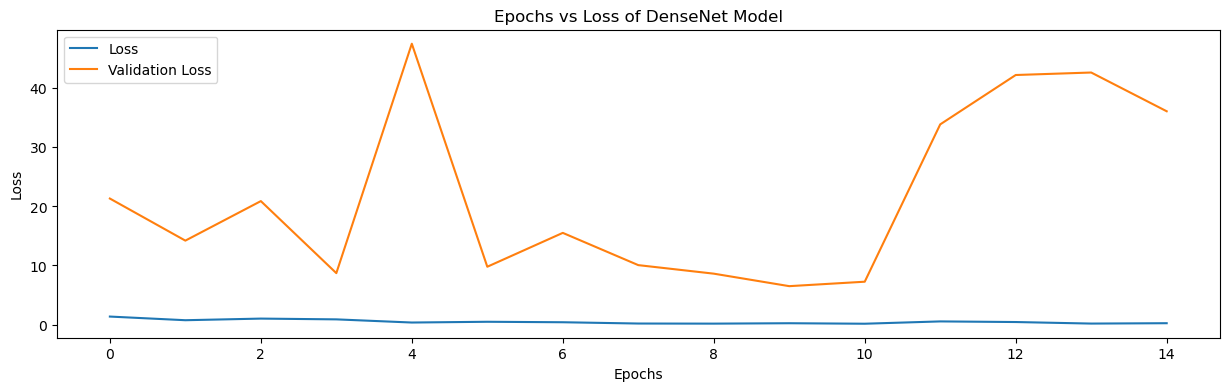

In [45]:
plt.figure(figsize = (15,4))
plt.plot(history_densenet.loss, label='Loss')
plt.plot(history_densenet.val_loss, label='Validation Loss')
plt.title('Epochs vs Loss of DenseNet Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

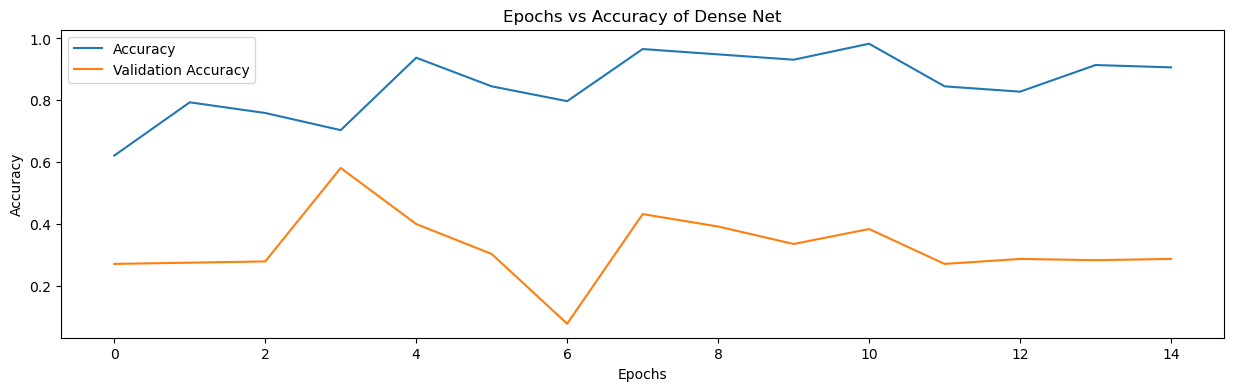

In [46]:
plt.figure(figsize = (15,4))
plt.plot(history_densenet.accuracy, label='Accuracy')
plt.plot(history_densenet.val_accuracy, label='Validation Accuracy')
plt.title('Epochs vs Accuracy of Dense Net')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()